In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the Iris dataset
iris = datasets.load_iris()

#Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Add the species (target) column to the DataFrame
df['species'] = iris.target

#Map numeric species to their corresponding names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#Display the first few rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


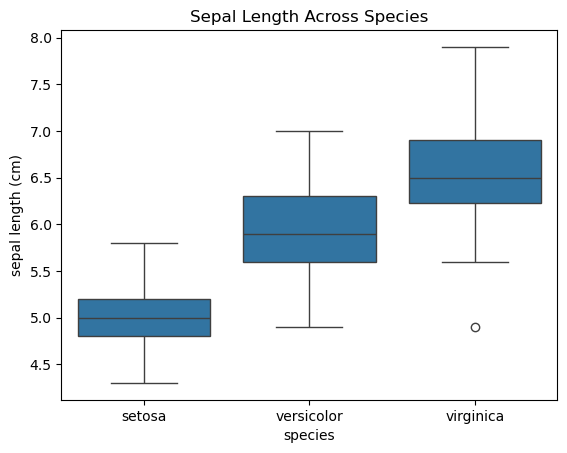

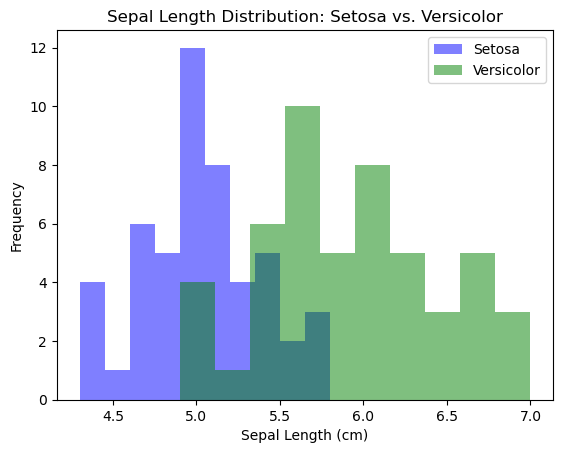

In [4]:
#Boxplot: Sepal Length Across Species
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Sepal Length Across Species')
plt.show()

#Filter the data for setosa and versicolor species
setosa = df[df['species'] == 'setosa']['sepal length (cm)']
versicolor = df[df['species'] == 'versicolor']['sepal length (cm)']

#Plot histograms for Sepal Length of Setosa and Versicolor
plt.hist(setosa, alpha=0.5, label='Setosa', color='blue')
plt.hist(versicolor, alpha=0.5, label='Versicolor', color='green')

plt.legend(loc='upper right')
plt.title('Sepal Length Distribution: Setosa vs. Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

In [6]:
t_stat, p_value = stats.ttest_ind(setosa, versicolor)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -10.52098626754911
P-value: 8.985235037487079e-18


In [10]:
#Define the bins and labels for the 'sepal width (cm)' category
bins = [0, 2.5, 3.0, 3.5, 4.0, 5.0]
labels = ['Very Narrow', 'Narrow', 'Medium', 'Wide', 'Very Wide']

#Create a new column in the dataframe for 'sepal width category'
df['sepal_width_category'] = pd.cut(df['sepal width (cm)'], bins=bins, labels=labels)

#Create the contingency table between 'sepal width category' and 'species'
contingency_table = pd.crosstab(df['sepal_width_category'], df['species'])

#Perform the Chi-Square test
chi_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

#Print the results
print(f'Chi-Square Statistic: {chi_stat}')
print(f'P-value: {p_value}')

Chi-Square Statistic: 60.13322368421053
P-value: 4.3887773154654894e-10


In [ ]:
Extracting the sepal lengths for each species
setosa_sepal = df[df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal = df[df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal = df[df['species'] == 'virginica']['sepal length (cm)']

Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(setosa_sepal, versicolor_sepal, virginica_sepal)

Print the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')